In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#数学模型
class Network(object):
    def __init__(self,NUM):
        np.random.seed(0)
        self.w=np.random.randn(NUM,1)
        self.b=0.0
    def forward(self,x):
        return np.dot(x,self.w)+self.b
    def loss(self, z, y):
        error=abs(z-y)
        Num=error.shape[0]
        cost=error*error
        cost=np.sum(cost)/Num
        return cost
    #阶梯下降
    def G(self,x,y):
        z=self.forward(x)
        G_w=(z-y)*x
        G_w=np.mean(G_w,axis=0)
        G_w=G_w[:,np.newaxis]
        G_b=(z-y)
        G_b=np.mean(G_b)
        return G_w,G_b
    def update(self,G_w,G_b,temp=0.01):
        self.w=self.w-temp*G_w
        self.b=self.b-temp*G_b
    def train(self,x,y,iterations=100,eta=0.01):
    # 对x进行切片
    # x是一个240*16的测试数据
    # 先设置mini-batch的大小
        losses=[]
        mini_batch=80
        X=x
        Y=y
    # 计算长度
        Index=X.shape[0]
    # 再把x切开
        js=mini_batch
        while js<=Index:
            x=X[js-mini_batch:js]
            y=Y[js-mini_batch:js]
            js+=mini_batch
            for i in range(iterations):
                z=self.forward(x)
                L=self.loss(z,y)
                G_w,G_b=self.G(x,y)
                self.update(G_w,G_b,eta)
                losses.append(L)
        if(js-80<Index):
            x=X[js-80,Index]
            y=Y[js-80,Index]
            for i in range(iterations):
                z=self.forward(x)
                L=self.loss(z,y)
                G_w,G_b=self.G(x,y)
                self.update(G_w,G_b,eta=0.01)
                losses.append(L)
        return losses

    

In [15]:
f=pd.read_csv("test.csv",header=None)
for i in range(11):
    f.drop(f[f[i].str.contains(pat='NR',regex=False)].index,inplace=True)
f.drop(f[f[1].str.contains(pat='RAINFALL',regex=False)].index,inplace=True)
del f[0]
del f[1]
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4319
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       4080 non-null   object
 1   3       4080 non-null   object
 2   4       4080 non-null   object
 3   5       4080 non-null   object
 4   6       4080 non-null   object
 5   7       4080 non-null   object
 6   8       4080 non-null   object
 7   9       4080 non-null   object
 8   10      4080 non-null   object
dtypes: object(9)
memory usage: 318.8+ KB


In [16]:
data=np.array(f,dtype=float)
data_real=data.mean(axis=1)
data_real=data_real.reshape((240,17))
data_real_max=data_real.max(axis=0)
data_real_min=data_real.min(axis=0)
# 归一化
for i in range(17):
    data_real[:,i]=(data_real[:,i]-data_real_min[i])/(data_real_max[i]-data_real_min[i])
print(data_real,'\n',data_real.shape[0],' ',data_real.shape[1])
# 抽取预测对象
data_PM25=data_real[:,9]
data_PM25=data_PM25[:,np.newaxis]
data_real=np.delete(data_real,9,axis=1)
# 数据分组
ratio=0.80
offset=int(ratio*data_real.shape[0])
training_data=data_real[:offset]
test_data=data_real[offset:]


[[0.47026022 0.48484848 0.34160584 ... 0.06268785 0.08897485 0.08687943]
 [0.20539033 0.66666667 0.31386861 ... 0.19321597 0.14119923 0.23049645]
 [0.9535316  0.57575758 0.41167883 ... 0.77458137 0.16441006 0.10283688]
 ...
 [0.88847584 0.57575758 0.4350365  ... 0.80077286 0.18375242 0.12588652]
 [0.15892193 0.54545455 0.47445255 ... 0.32245599 0.05415861 0.13120567]
 [0.27973978 0.45454545 0.09343066 ... 0.13482181 0.49129594 0.50531915]] 
 240   17


In [17]:
data_real.shape[1]

16

In [23]:
# 获取数据
x=data_real
y=data_PM25
# 创建网络
net=Network(16)
# 启动训练

losses=net.train(x,y,iterations=100,eta=0.01)


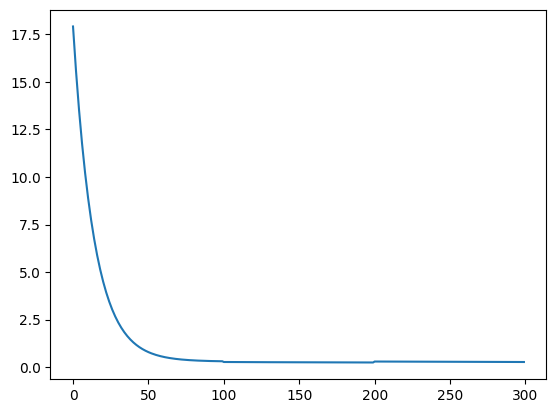

In [29]:

plot_x=np.arange(300)
plot_y=np.array(losses)
plt.plot(plot_x,plot_y)
plt.show()

In [ ]:
list=[[1,1,1],[1,1,1],[1,1,1]]
List=[2,5,3]
L=np.array(list).reshape(3,3)
l=np.array(List).reshape(3,1)
L.shape[0]


3

In [ ]:
class EVA(object):
    def __init__(self,num):
        self.w=num
        print('EVA')
    def jia(self, x,y,J=1):
        return x+y+self.w-J
    def jian(self,x,y):
        return x-y+self.w
eva=EVA(1)
print(eva.jia(1,2,10))

EVA
-6


In [ ]:
x.shape[1]

16

In [ ]:
def train(self,x,y,iteration=100,eta=0.01):
    # 对x进行切片
    # x是一个240*16的测试数据
    # 先设置mini-batch的大小
    losses=[]
    mini_batch=80
    X=x
    Y=y
    # 计算长度
    Index=X.shape[0]
    # 再把x切开
    js=mini_batch
    while js<=Index:
        x=X[js-mini_batch:js]
        y=Y[js-mini_batch:js]
        js+=mini_batch
        for i in range(iteration):
            z=self.forward(x)
            L=self.loss(z,y)
            G_w,G_b=self.G(x,y)
            self.update(G_w,G_b,eta=0.01)
            losses.append(L)
    if(js-80<Index):
        x=X[js-80,Index]
        y=Y[js-80,Index]
        for i in range(iteration):
            z=self.forward(x)
            L=self.loss(z,y)
            G_w,G_b=self.G(x,y)
            self.update(G_w,G_b,eta=0.01)
            losses.append(L)
    return losses
